In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [213]:
titanic = pd.read_csv('./titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [214]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [215]:
# 생존률 표시 선그래프 사용 객실 등급에 따른 생존률 표시 
# 객실 등급에 따른 생존자와 사망자 평균을 계산 
pclass_survived_mean = titanic.groupby('Pclass')['Survived'].mean().reset_index()  
pclass_survived_mean # 인덱스값 초기화


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


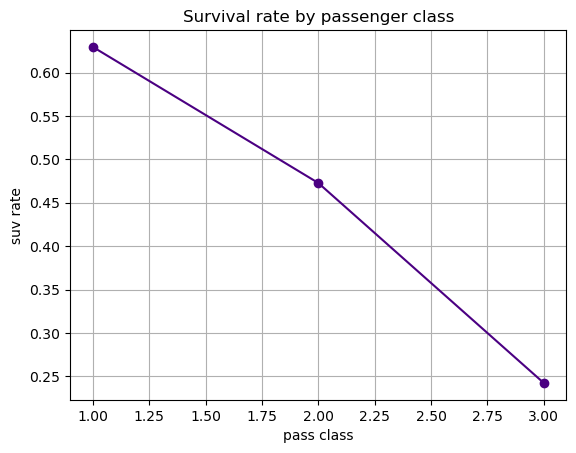

In [216]:
# bar chart
x=pclass_survived_mean['Pclass']
y=pclass_survived_mean['Survived']
plt.plot(x, y, marker='o', linestyle='-', color='indigo')

plt.title('Survival rate by passenger class')
plt.xlabel('pass class')
plt.ylabel('suv rate')
plt.grid(True)
plt.show()

In [217]:
# 각 승선 항구에 따른 생존자 수 확인 
# 막대 그래프를 사용: 수직, 수평
# 막대 그래프는 시계열 데이터와 같이 시간에 따른 데이터 변화 표현에 적합 
# 수평 막대 그래프는 두 범주 간의 차이를 수평으로 비교할때 적합 

# 생존자: titanic['생존함'] == 1
# 승선 항구에 따른 생존자 

survived_counts = titanic[titanic['Survived'] == 1] ['Embarked'].value_counts()
survived_counts

Embarked
S    217
C     93
Q     30
Name: count, dtype: int64

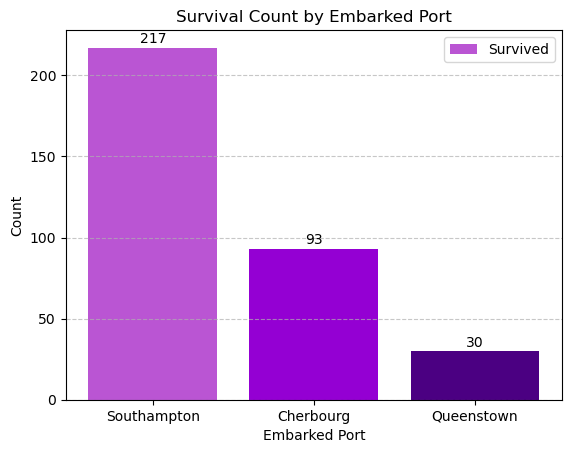

In [218]:
# 막대그래프 그리기
x = survived_counts.index
y = survived_counts

plt.bar(x, y, color=['mediumorchid', 'darkviolet', 'indigo'])
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.xticks(x, ['Southampton', 'Cherbourg', 'Queenstown'])
plt.legend(['Survived'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(y):
  plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.show()



In [219]:
# 성별에 따른 생존자 수 확인 
survived_counts = titanic[titanic['Survived'] == 1] ['Sex'].value_counts()
survived_counts

Sex
female    233
male      109
Name: count, dtype: int64

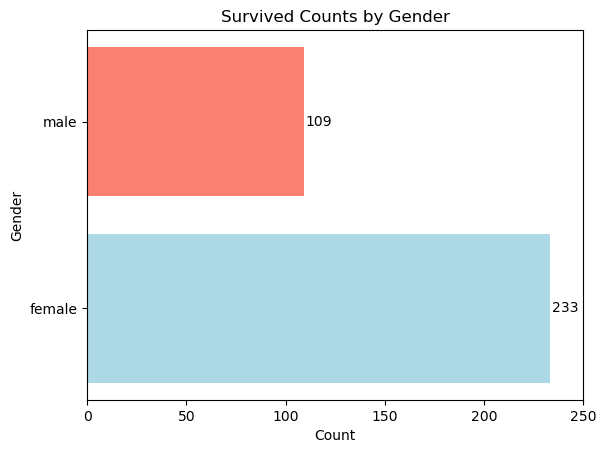

In [220]:
# 수평 막대그래프: barh()
x = survived_counts.index
y = survived_counts

plt.barh(x, y, color=['lightblue', 'salmon'])
plt.title('Survived Counts by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.xlim([0, 250])

for i, value in enumerate(y):
  plt.text(value + 1, i, str(value), ha='left', va='center')

plt.show()

In [221]:
# 나이와 요금에 따른 생존자 분포
# 산점도 그래프 scatter() 활용 두변수간 데이터 분포 
# 변수간 상관관계 , 분포 군집 파악에 적합 
# 매출과 마케팅 비용 지출에 따른 상관관계 파악 

# 결측치 처리 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
titanic = titanic.dropna(subset=['Age','Fare', 'Survived'])

titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


## 산점도 그래프 옵션 ##


- plt.figure(figsize=(12, 8)): 산점도 그래프의 크기를 설정, 가로 12인치, 세로 8인치
- plt.scatter(): 산점도 그래프
1. c: 각 데이터 포인트의 색상을 지정. 생존 여부에 따라 다른 색으로 표현
2. cmap: 컬러맵을 지정. Set2지정
3. alpha: 투명도
- plt.legend: 범례
- handles=scatter.legend_elements()[0]: 범례의 핸들. 핸들은 그래프에 그려진 선, 점, 막대 등 시각적 요소에 대한 설명을 의미.
- 범례는 이러한 핸들을 사용하여 각 요소가 무엇을 나타내는지 사용자에게 알려줌.
- 산점도 그래프의 경우 각 데이터 포인트의 색상이 승객의 생존 여부를 나타내기 때문에, 범례 핸들은 이러한 색상과 대응되는 설명을 제공
- scatter.legend_elements(): 산점도 그래프에서 사용된 색상에 대한 핸들을 반환. 반환 값은 핸들과 레이블의 튜플. 예를 들어 산점도 그래프에서 두 가지 색상이 사용되었다면, scatter.legend_elements는 두 개의 핸들과 그에 대응되는 두 개의 레이블을 반환
- scatter.legend_elements()[0]: 반환된 튜플의 인덱스가 0인 요소를 선택

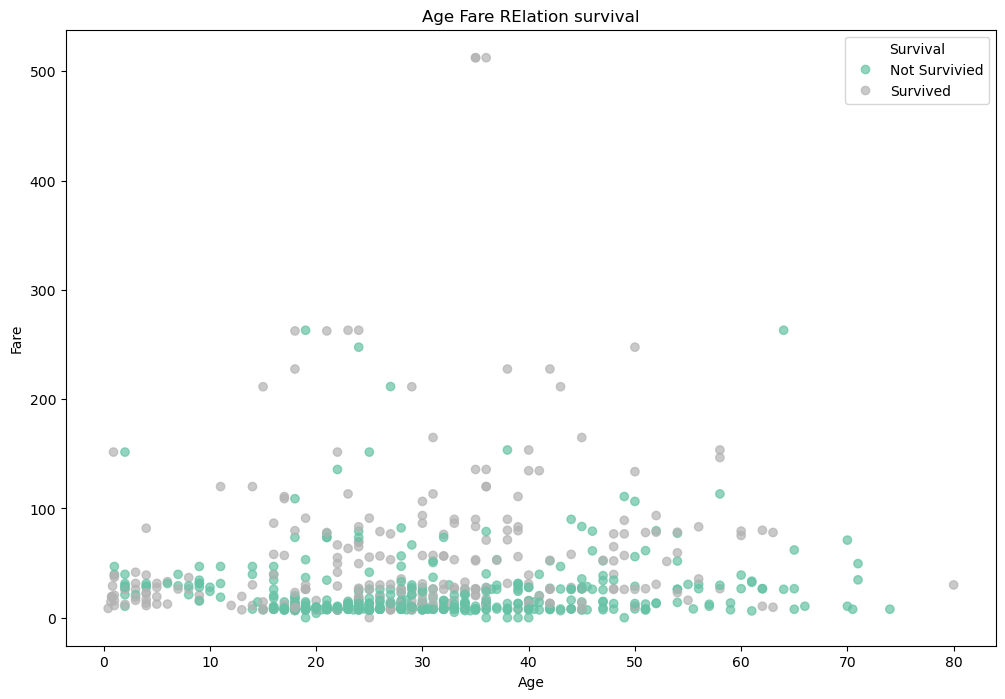

In [223]:
# 산점도 그래프 
plt.figure(figsize=(12,8))
scatter = plt.scatter(x = 'Age', y = 'Fare', data=titanic, c=titanic['Survived'], cmap='Set2', alpha=0.7)
plt.title("Age Fare RElation survival")
plt.xlabel("Age")
plt.ylabel("Fare")

plt.legend(handles=scatter.legend_elements()[0], title='Survival', labels= ['Not Survivied','Survived'], loc = 'upper right')
plt.show()

## 파이 차트 ##
- 파이 차트는 전체 데이터에서 특정 요소의 비율을 시각적으로 나타낼 때 사용.
- 여기서는 타이타닉 데이터셋에서 사망자와 생존자 비율을 나타내는 파이 차트를 시각화


## 파이 차트 옵션 ##


- survived_counts: 각 범주의 크기를 나타내는 데이터
- labels: 각 범주에 대한 이름
- colors: 각 범주에 대한 색상
- autopct="%0.1f%%": 각 범주의 백분율을 소수점 첫 번째 자리까지 표시
- startngle=90: 파이 차트의 시작 각도를 지정. 여기서는 90도로 설정되어 있어 파이 차트가 위에서 부터 시작
- shadow=True: 그림자 표시 여부
- explode=(0, 0.1): 각 범주를 강조하기 위해 범주별로 튀어나옴의 정도를 설정.
- 해당 코드에서는 Survived 범주는 0.1 값을 부여하여 약간 튀어나오도록 설정되어 있고 Not Survived 범주는 0 값을 부여하여 튀어나오지 않도록 설정

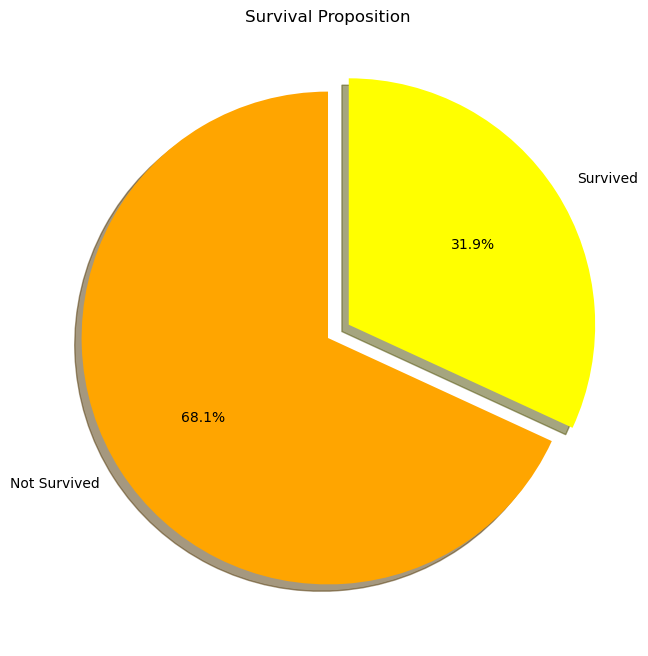

In [224]:
# 파이 차트 
plt.figure(figsize=(8 , 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], colors=['orange', 'yellow'], autopct="%0.1f%%", startangle=90, shadow=True, explode=(0, 0.1))
plt.title('Survival Proposition')
plt.show()

## 히스토그램 ##


- 히스토그램은 연속된 데이터를 구간으로 나누어 각 구간에 속하는 데이터의 빈도를 표현하는 그래프
- 예를 들어 매출 데이터에서 일정 기간의 일일 매출액을 시각화 하여 각 구간에 해당하는 일일 매출액 범위에서 어떤 빈도로 매출이 발생하는지 파악하는 것
- 히스토그램 표현을 위한 데이터 정리 - 나이 결측치 제거


## 히스토그램 옵션 ##

- hist()
- bins: 구간의 개수
- edgecolor: 테두리 색상

In [225]:
titanic = titanic.dropna(subset=['Age'])
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB
None


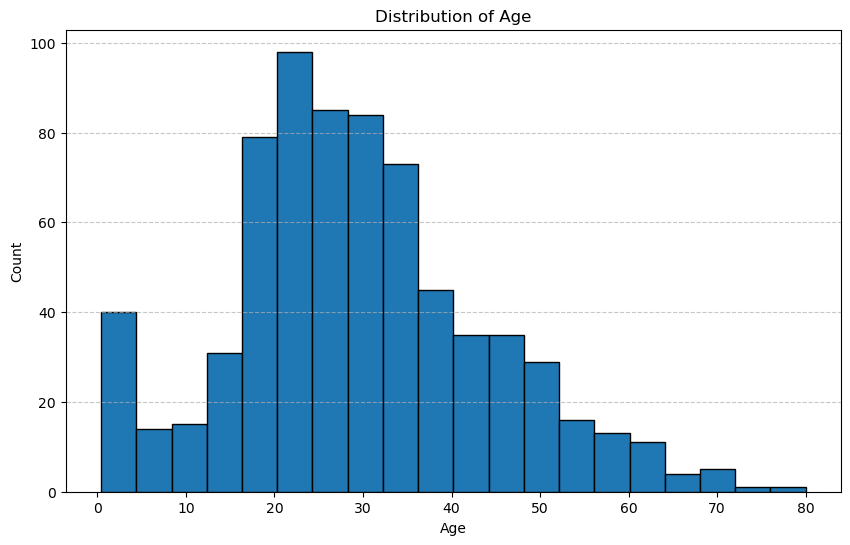

In [226]:
plt.figure(figsize=(10,6))
plt.hist(titanic['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 히트맵: 두 변수의 상관 관계를 표시 ##


- 히트멥은 2차원 데이터를 색상으로 표현하는 그래프
- 행렬 형태의 데이터를 시각화할 때 자주 사용
- 값이 진할수록 연관성이 높다는 의미
- 각 값에 따라 다양한 색상을 사용하여 패턴, 상관 관계, 분포 등을 확인하는데 유용
- 히트맵은 matshow() 함수 또는 imshow() 함수로 그래프를 그릴 수 있다.


1. matshow():
- 그래프의 정보를 명확하게 표시
- 로우와 컬럼 레이블을 추가하여 표시
- 로우 컬럼 순서를 명확하게 시각화
- 기본적으로 생상을 표시


2. imshow():
- 이미지만 표시
- 행과 열 레이블을 추가하지 않음
- 색상을 표시하지 않으며, 색상을 표시하려면 colorbar()를 사용

In [227]:
titanic = pd.read_csv('titanic.csv')

# 결측치 처리 
titanic = titanic.dropna(subset= ['Age', 'Fare'])
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [228]:
correlation_matrix = titanic.drop('PassengerId', axis=1).corr(numeric_only=True)
correlation_matrix

# corr() 함수는 변수들 간의 산관 행렬을 계산한다.
# numeric_only=true는 수치형 데이터 만들 상관 계수를 계산하라는 옵션
# 상관 행렬이란 여러 변수 간의 선형적인 상관관계를 나타내는 통계 지표를 말함.
# 예를 들어 Age와 Survived 간의 상관 관계가 양인지 음인지, 그리고 강도는 어느 정도인지를 파악
# 현재 Age와 Survived 간의 상관 계수는 -0.077221로 이는 음의 상관 관계를 나타낸다. -1 ~ 1 사이의 값: 0.07은 상관관계가 약하다고 판단.
# Fare와 Survived 양의 상관관계를 가짐. 따라사 요금이 비쌀수록 생존률이 높다고 판다.


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


## 히트맵 시각화 ##


- correlation_matrix: 히트맵으로 시각화할 상관 행렬
- cmap: 색상 맵을 지정. 여기서는 RuRd_r을 입력하여 보라색 계열로 표현
- plt.colorbar(): 오른쪽에 생상 참고를 위한 컬러바 추가
- range(len(correlation_matrix.columns)): x축의 눈금 위치를 지정. 상관 행렬의 열수에 따라 0부터 열 수까지의 범위 지정
- correlation_matrix.columns: x축에 표시할 눈금의 라벨을 설정. 여기서는 상관 행렬의 각 열의 이름을 사용
- rotation=45: 텍스트를 45도로 회전시켜 표시. 이를 통해 행렬의 열 이름이 겹치지 않고 가독성을 높일 수 있음.

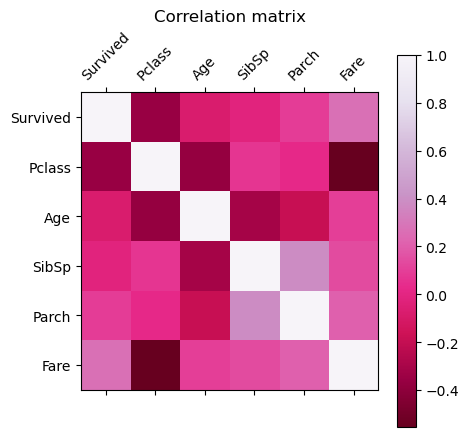

In [229]:
plt.matshow(correlation_matrix, cmap='PuRd_r')
plt.colorbar()

# x axis y axis grid 
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation matrix")
plt.show()

In [230]:
# 나이대별 생존자와 사망자 수 표시

# 결측치 처리
titanic = titanic.dropna(subset=['Age', 'Fare'])

# 범주형 분수로 변환
age_group = pd.cut(titanic['Age'], bins=range(0, 81, 5)) # 0세부터 80세까지 5세 간격으로 나눈 다음 잘라서 그룹 생성

survived_counts = titanic.groupby([age_group, 'Survived'], observed=False).size().unstack().fillna(0)
# Age 그룹과 Survived 변수를 기분으로 데이터를 그룹화
# observed: 데이터가 없더라도 모든 가능한 조압을 결과에 포함
# size(): 각 그룹의 크기(빈도)를 계산
# unstack(): 그룹화된 결과를 피벗 테이블 형태로 변환하여 인덱스를 열로 포함. 여기서는 나이대별로 생존자와 사망자 수를 구분
survived_counts

Survived,0,1
Age,,
"(0, 5]",13,31
"(5, 10]",13,7
"(10, 15]",8,11
"(15, 20]",63,33
"(20, 25]",80,42
"(25, 30]",66,42
"(30, 35]",47,41
"(35, 40]",39,28
"(40, 45]",30,17


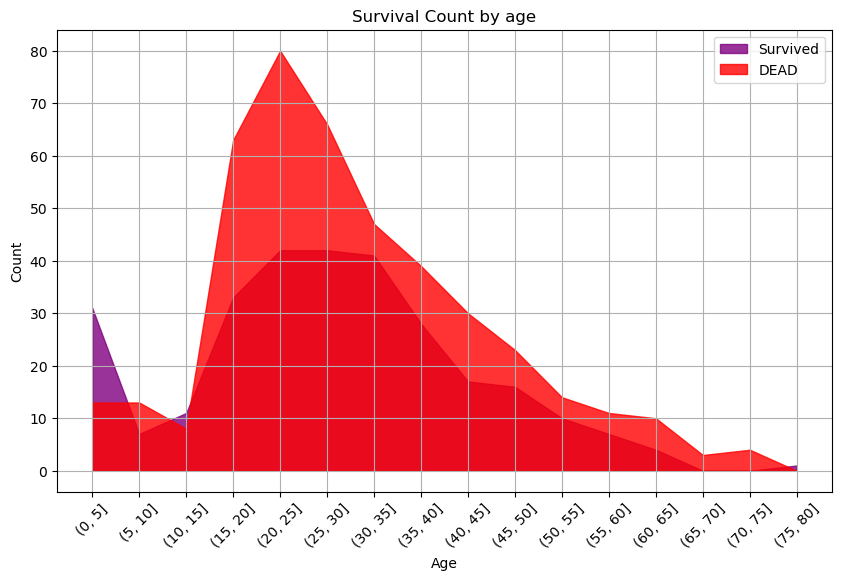

NameError: name 'grid' is not defined

In [231]:
# 영역 그래프 생성 
# fill_between(): x 좌표로 사용한 나이 구간 - survived_counts.index.astype(str)
# survived_counts.index: 생성된 데이터 프레임의 인덱스. 여기서 인덱스는 나이구간을 나타낸다
# astype(str): 인덱스를 문자열로 변환. 이는 구간을 시각적으로 명확하게 표시하기 위해 변환 
# survived_counts[1] : y1 좌표를 사용한 생존자수 . 각 나이대별 생존자 수 

plt.figure(figsize=(10,6))
plt.fill_between(survived_counts.index.astype(str), survived_counts[1], color='purple', alpha=0.8, label='Survived')
plt.fill_between(survived_counts.index.astype(str), survived_counts[0], color='red', alpha=0.8, label='DEAD')
plt.title('Survival Count by age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
grid

## 박스 플롯: 승객 나이의 데이터 분포, 중앙값, 이상치 파악 ##


- 박스 플롯은 데이터의 분포와 중앙값. 이상치를 시각적으로 나타내는 그래프.
- 박스데이터의 1사분위와 3사분위를 표현
- 박스의 길이는 데이터의 중간 50% 범위
- 상자 내부에 있는 주황색 가로선은 데이터의 중앙값
- 수염은 박스에서 일자로 뻗은 T자 모양의 선이며 박스플롯에서 1.5배 IQR 범위 내의 데이터 중 최소값과 최대 값을 시각화
- 이상치는 수염을 벗어난 범위에 위치한 데이터를 점으로 표현
- 일반적으로 수염 내의 데이터가 분석에 요효하다고 간주하므로, 수염을 벗어난 데이터는 이상치로 분류되어 별도의 점으로 표현

C:\Users\3호실-09\AppData\Local\Temp\ipykernel_8368\2511556737.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([titanic[titanic['Pclass'] == 1]['Age'], titanic[titanic['Pclass'] == 2]['Age'], titanic[titanic['Pclass'] == 3]['Age']], labels=['1st Class', '2nd Class', '3rd Class'])


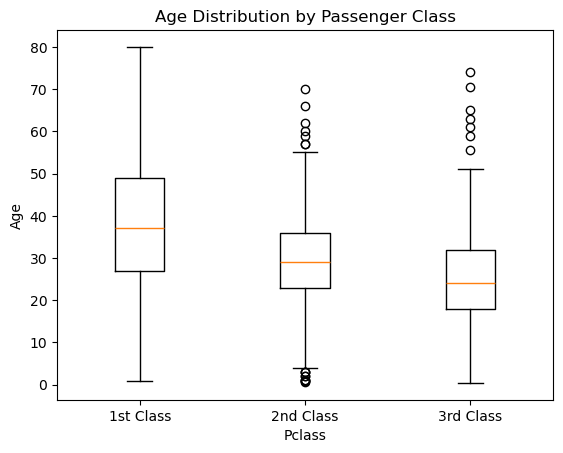

In [ ]:
# 승객 등급에 따른 나이의 박스 플롯
plt.boxplot([titanic[titanic['Pclass'] == 1]['Age'], titanic[titanic['Pclass'] == 2]['Age'], titanic[titanic['Pclass'] == 3]['Age']], labels=['1st Class', '2nd Class', '3rd Class'])
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()
# 1등급 승객 .박스 3개의 그래프중 가장 위 쪽에 위치하여 중간범위가 높음 이는 나이가 많은 승객들이 1등급 객실을 많이 이용함을 시사 
# 2등급 승객 박스 위치를 보면 2등급 승객의 나이 분포는 1등급에 비해 낮음 3등급 보다는 높음 
# 이는 주로 중간 나이 2등급 
# 3등급 승객의 박스 위치가 가장 낮음 
# 이는 젊은 승객이 주로 3등급 이용 했고 어른 나이 쪽 이상치가 없음 나이가 가장 많은 승객 이상치 있음 
# 3등급 승객은 주로 가족 단위 저렴 객실 이민자 노동자 계층 가능성 
# 이상치란?  다른 자료와는 극단적으로 다른 값, 즉 유달리 높거나 낮은 값을 보이는 것을 일컫는다.

In [94]:
# 바이올린 플롯: 동일한 범주 내에서 데이터 간 분포를 비교하거나 이상치를 탐지할떄 사용 
# 승객 등급에 따른 나이 분포 표시하기 
# 결측치에 평균치 적용 ( 결측치 표기 되지 않은 값 missing value)

#결측치 평균치 적용 
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
# titanic['Age'].mean()

<Figure size 1000x500 with 0 Axes>

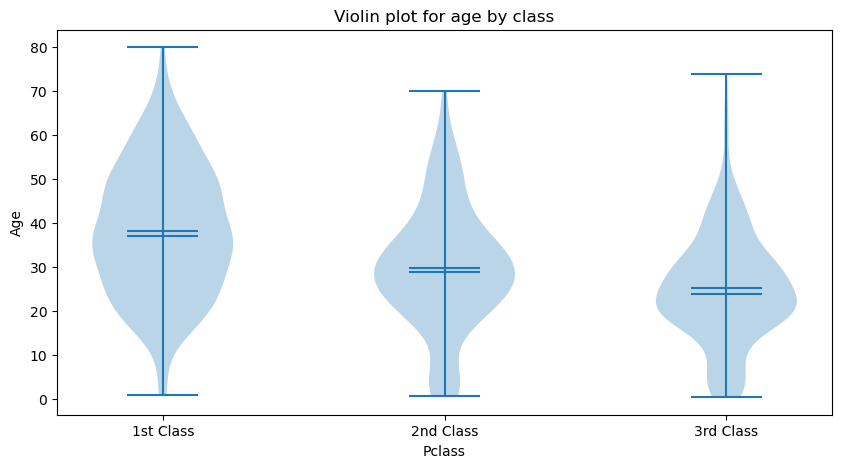

In [ ]:
from seaborn import violinplot


plt.figure(figsize=(10,5))
violin_plot = plt.violinplot([titanic[titanic['Pclass'] == 1]['Age'], titanic[titanic['Pclass'] == 2]['Age'], titanic[titanic['Pclass'] == 3]['Age']], showmeans=True, showmedians=True,)

plt.title('Violin plot for age by class')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.xticks([1,2,3], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

## 에러바: 요금의 평균과 표준편차 표현하기 ##
- 에러바는 통계적 불확실성 또는 편차를 시각적으로 표현하는 그래프
- 주로 그래프나 차트에 사용하여 데이터 포인트 주변의 오차 또는 편차 범위를 표시하는데 활용
- 에러 바는 데이터의 신뢰성과 실험의 정확성을 시각적으로 전달하는데 유용
- 이때 데이터 신뢰성은 데이터의 정확성, 일관성, 그리고 재현성을 위미
- 에러바는 서로 다른 그룹 간의 비교를 나타낼 때 각 그룹의 불확실성을 보여줌으로써 차이의 통계적 유의성을 평가하고 결과를 비교하는데 두움이 됨
- 두 그룹의 에러바가 겹치지 않으면, 그 차이가 통계적으로 유의할 가능성이 높음


## 에러 바가 나타내는 데이터 신뢰성은 다음과 같은 요소를 포함 ##
- 측정 불확실성: 에러바는 데이터 포인트의 측정값이 얼마나 정확한지를 시각적으로 나타냄. 에러바가 짧을수록 측정값의 불확설성이 적고, 더 신뢰할 수 있는 데이터를 의미
- 표본 변동성: 표본 데이터의 변동성을 나타냄. 데이터 포인트가 여러 번 측정되거나 여러 표본에서 수집된 경우, 에러 바는 그 변동성을 반영함. 변동성이 작을수록 데이터의 신뢰성이 높음
- 통계적 유의성: 두 그룹 또는 조건 간의 차이가 통계적으로 유의한지를 평가하는 데 도움을 줌. 에러바가 겹치지 않으면, 구 그룹 간의 차이가 통계적으로 유의할 가능성이 높음
- 신뢰구간: 에러 바는 일반적으로 평균값 주위의 신뢰구간을 나타냄. 예를 들어 95% 신뢰 구간의 에러 바는 해당 범위 내에 실제 평균값이 95%의 확률로 포함된다는 것을 의미

In [154]:
# 부모 자녀 동반자 수에 대한 요금의 평균 및 표준 편차 계산 
fare_means = titanic.groupby('Parch')['Fare'].mean()
print(fare_means)

fare_std = titanic.groupby('Parch')['Fare'].std()
print(fare_std)
# 동반자수가 4인 경우 평균 요금이 가장 높다 
# 많은 가족이 함께 여행하는 경우 요금이 높다 
# 4명의 동반자인 경우 118.78로 편차가 가장 크고 , 따라서 요금 분포도가 다양함을 시사 
# 동반자 수가 6인 경우 NaN 으로 결측치가 나오는데, 이는 필요한 경우 원인을 파악해야한다

Parch
0    27.283276
1    48.273714
2    67.175062
3    25.951660
4    84.968750
5    32.550000
6    46.900000
Name: Fare, dtype: float64
Parch
0     44.289567
1     65.677489
2     70.456533
3      7.862611
4    118.731099
5      4.101134
6           NaN
Name: Fare, dtype: float64


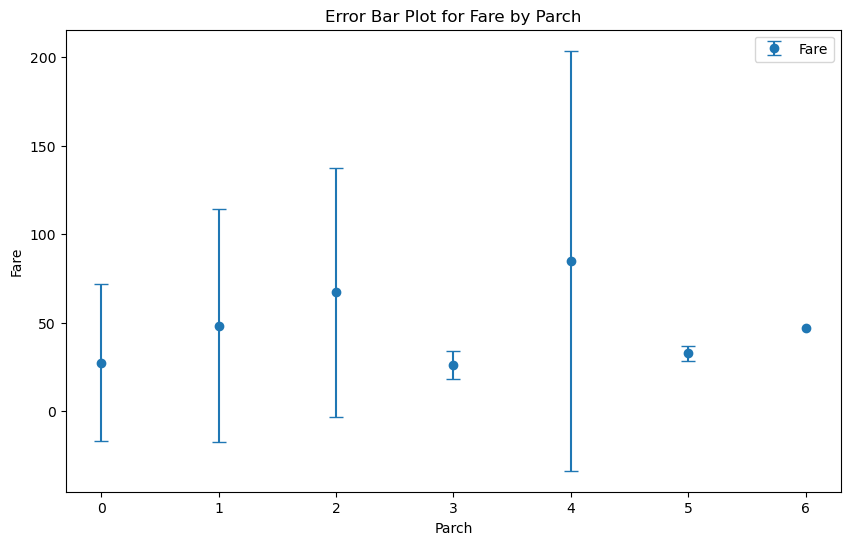

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(fare_means.index, fare_means, yerr=fare_std, fmt='o', capsize=5, capthick=1, label='Fare')
plt.title('Error Bar Plot for Fare by Parch')
plt.xlabel('Parch')
plt.ylabel('Fare')
plt.legend()
plt.show()

# yerr=fare_std: 에러바의 길이로 사용할 표준 편차
# fmt='o': 데이터 포인트를 원 형태로 표시
# capsize=5: 에러바의 끝에 그려지는 캡의 크기
# captick=1: 에러바 끝에 그려지는 캡의 두께를 설정
# label='Fare': 범례에 사용할 레이블 지정

## 멀티 그래프 생성 ##


1. plt.subplot() 함수 사용
- 개별 서브플롯을 하나씩 생성
- 이 함수는 하나의 그림인 figure에 서브플롯을 하나씩 추가할 때 사용
- 예를 들어 plt.subplot(2, 2, 1)은 2행 2열의 그림 영역에서 첫 번째 위치에 서브플롯을 생성


2. plt.subplots() 함수 사용
- 개별 서브플롯을 동시에 생성
- 이 함수는 하나의 그림인 figure에 서브플롯을 동시에 여러 개를 만들어 배열 형태로 반환
- 예를 들어 fig, axes=plt.subplots(2, 2)는 2행 2열의 서브플롯 배열을 만들어 axes 변수에 저장.
- 이후 axes[0, 0], axes[0, 1] 등의 방식으로 각 서브플롯에 접근할 수 있음

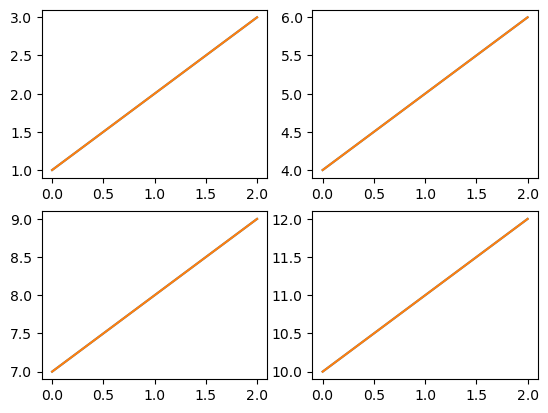

In [ ]:
# 개별 서브풀로 하나씩 생성 
# subplot(nrows, ncols, index)
# nrows 전체 그림 로우 개수 
# ncols 전체 그림 영역 컬럼 개수 
# index 현재 서브 플롯 위치 

plt.subplot(2,2,1)
plt.plot([1,2,3])

plt.subplot(2,2,2)
plt.plot([4,5,6])

plt.subplot(2,2,3)
plt.plot([7,8,9])

plt.subplot(2,2,4)
plt.plot([10,11,12])



In [158]:
# 동반자 수에 따른 생존 여부를 두가지 그래프로 시각화 

parch_counts = titanic.groupby('Parch')['Survived'].value_counts().unstack().fillna(0)
parch_counts

Survived,0,1
Parch,,
0,335.0,186.0
1,49.0,61.0
2,29.0,39.0
3,2.0,3.0
4,4.0,0.0
5,4.0,1.0
6,1.0,0.0


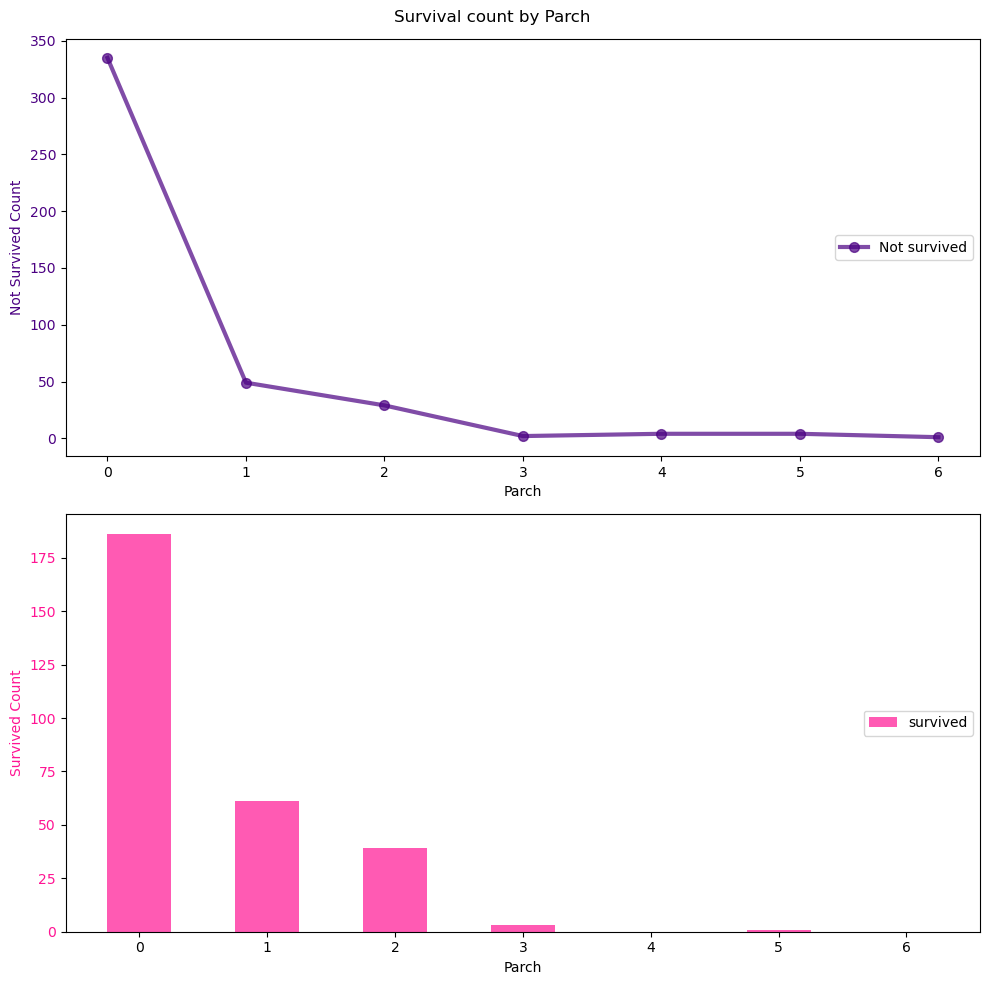

In [207]:
# x, y 값 설정 

x = parch_counts.index.astype(str) # 데이터 프레임 인덱스 문자열 변환
y1 = parch_counts[0].values # dead
y2 = parch_counts[1].values # alive

plt.figure(figsize=(10,10))

# 첫번째 서브 플롯 : 선그래프 
plt.subplot(2,1,1) # 2개 의 로우와 하나의 컬럼 그래프중 첫번째 
# 선그리기 
plt.plot(x, y1 , '-o' ,color='indigo', markersize=7, linewidth=3, alpha=0.7, label='Not survived')
plt.xlabel('Parch')
plt.ylabel('Not Survived Count', color='indigo')
plt.tick_params(axis='y', labelcolor='indigo')
plt.legend(loc='center right')


plt.subplot(2,1,2) # 2개 의 로우와 하나의 컬럼 그래프중 두번째 
# 막대 그리기 
plt.bar(x, y2 , color='deeppink', alpha=0.7, width=0.5, label='survived')
plt.xlabel('Parch')
plt.ylabel('Survived Count', color='deeppink')
plt.tick_params(axis='y', labelcolor='deeppink')
plt.legend(loc='center right')

# 슈파 타이틀 
plt.suptitle('Survival count by Parch ')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

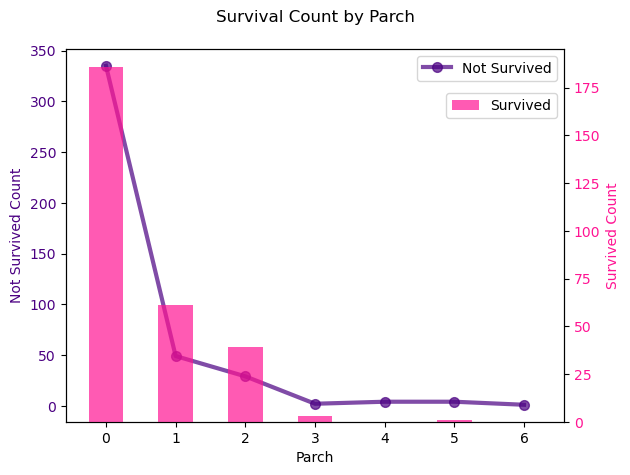

In [211]:
plt.clf()


x = parch_counts.index.astype(str) # 데이터 프레임의 인덱스를 문자열로 변환
y1 = parch_counts[0].values # 사망자
y2 = parch_counts[1].values # 생존자

fig, ax1 = plt.subplots()

# 첫번째 서브플롯 설정: 선 그래프
ax1.plot(x, y1, '-o', color='indigo', markersize=7, linewidth=3, alpha=0.7, label='Not Survived')
ax1.set_xlabel('Parch')
ax1.set_ylabel('Not Survived Count', color='indigo')
ax1.tick_params(axis='y', labelcolor='indigo')
ax1.legend(loc='upper right')

# tweinx 함수를 사용하여 두 번째 그래프와 축을 공유하는 새로운 축 객체 생성
ax2 = ax1.twinx()

# 첫번째 서브플롯 설정: 선 그래프
ax2.bar(x, y2, color='deeppink', alpha=0.7, width=0.5, label='Survived')
ax2.set_xlabel('Parch')
ax2.set_ylabel('Survived Count', color='deeppink')
ax2.tick_params(axis='y', labelcolor='deeppink')
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9)) # 오른쪽 상단으로부터 (1, 0.9)만큼 떨어져 생성

# 수퍼 타이틀
plt.suptitle('Survival Count by Parch')

plt.tight_layout()
plt.show()